In [1]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.impute import SimpleImputer

np.random.seed(0)

In [2]:
data = pd.read_csv('train.csv', index_col='PassengerId')
data.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
selected_cols = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked']
new_data = data[selected_cols]
new_data.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
PassengerId,,,,,,,
1,0,3,male,22.0,1,7.2500,S
2,1,1,female,38.0,1,71.2833,C
3,1,3,female,26.0,0,7.9250,S
4,1,1,female,35.0,1,53.1000,S
5,0,3,male,35.0,0,8.0500,S


In [5]:
new_data.tail(3)

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
PassengerId,,,,,,,
889,0,3,female,NaN,1,23.45,S
890,1,1,male,26.0,0,30.00,C
891,0,3,male,32.0,0,7.75,Q


In [6]:
new_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Fare          0
Embarked      2
dtype: int64

In [7]:
age_nans = new_data.Age.isnull().sum()
age_nans

177

In [8]:
percent_nans = age_nans / len(new_data) * 100
percent_nans

19.865319865319865

In [9]:
imputer = SimpleImputer(strategy='median')

In [10]:
age = new_data[['Age']]
age.head(3)

,Age
PassengerId,
1,22.0
2,38.0
3,26.0


In [11]:
age.isnull().sum()

Age    177
dtype: int64

In [12]:
imp_age = pd.DataFrame(imputer.fit_transform(age))
imp_age.columns = age.columns
imp_age.index = age.index

In [13]:
imp_age.isnull().sum()

Age    0
dtype: int64

In [14]:
new_data = new_data.assign(imp_age=imp_age)
new_data.drop(['Age'], axis=1, inplace=True)
new_data.head()

,Survived,Pclass,Sex,SibSp,Fare,Embarked,imp_age
PassengerId,,,,,,,
1,0,3,male,1,7.2500,S,22.0
2,1,1,female,1,71.2833,C,38.0
3,1,3,female,0,7.9250,S,26.0
4,1,1,female,1,53.1000,S,35.0
5,0,3,male,0,8.0500,S,35.0


In [15]:
new_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Fare        0
Embarked    2
imp_age     0
dtype: int64

In [16]:
new_data.dropna(inplace=True)
new_data.shape

(889, 7)

In [17]:
numerical_cols = [col for col in new_data.columns if new_data[col].dtype in ['int64', 'float64']]
numerical_cols

['Survived', 'Pclass', 'SibSp', 'Fare', 'imp_age']

In [18]:
categorical_cols = [col for col in new_data.columns if new_data[col].dtype == 'object']
categorical_cols

['Sex', 'Embarked']

In [19]:
new_data[categorical_cols].nunique()

Sex         2
Embarked    3
dtype: int64

In [20]:
y = new_data.Survived
X = new_data.drop(['Survived'], axis=1)
X.head(3)

,Pclass,Sex,SibSp,Fare,Embarked,imp_age
PassengerId,,,,,,
1,3,male,1,7.2500,S,22.0
2,1,female,1,71.2833,C,38.0
3,3,female,0,7.9250,S,26.0


In [21]:
X.shape

(889, 6)

In [22]:
encoder = LabelEncoder()

In [23]:
X = X.join(X[categorical_cols].apply(encoder.fit_transform).add_suffix('_Label'))
X.head(3)

,Pclass,Sex,SibSp,Fare,Embarked,imp_age,Sex_Label,Embarked_Label
PassengerId,,,,,,,,
1,3,male,1,7.2500,S,22.0,1,2
2,1,female,1,71.2833,C,38.0,0,0
3,3,female,0,7.9250,S,26.0,0,2


In [24]:
X = X.drop(categorical_cols, axis=1)
X.head(3)

,Pclass,SibSp,Fare,imp_age,Sex_Label,Embarked_Label
PassengerId,,,,,,
1,3,1,7.2500,22.0,1,2
2,1,1,71.2833,38.0,0,0
3,3,0,7.9250,26.0,0,2


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

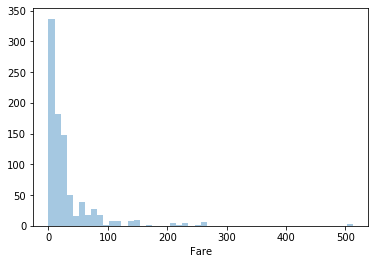

In [26]:
sns.distplot(X.Fare, kde=False)

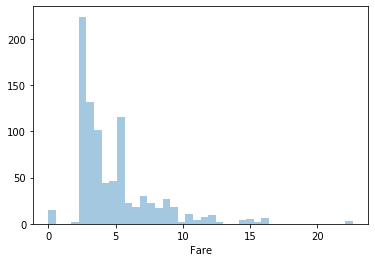

In [27]:
sns.distplot(np.sqrt(X['Fare']), kde=False)

In [28]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=33)
X_train.shape

(711, 6)

In [29]:
X_valid.shape

(178, 6)

In [30]:
model = DecisionTreeClassifier(random_state=0)

In [31]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [32]:
preds = model.predict(X_valid)

In [ ]:
preds

In [34]:
len(preds)

178

In [35]:
model.predict_proba(X_valid)[:10]

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [39]:
pd.crosstab(preds, y_valid, rownames=['Actual Status'], colnames=['Predicted Status'])

Predicted Status,0,1
Actual Status,,
0,99,21
1,12,46


In [38]:
y_valid.value_counts()

0    111
1     67
Name: Survived, dtype: int64